## **Installation**

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import norm
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## **Importing Data**

In [2]:
# Create a DataFrame from CSV data
df = pd.read_csv("strokes.csv")

## **Inspecting Data**

In [3]:
# Display the DataFrame Shape
df.shape

(8422, 38)

In [4]:
# DataFrame Size
df.size

320036

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8422 entries, 0 to 8421
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tour_code                8422 non-null   object 
 1   tour_description         8422 non-null   object 
 2   year                     8422 non-null   int64  
 3   tourn_id                 8422 non-null   int64  
 4   player_id                8422 non-null   int64  
 5   course_id                8422 non-null   int64  
 6   permanent_tourn          8422 non-null   int64  
 7   first_name               8422 non-null   object 
 8   last_name                8422 non-null   object 
 9   round                    8422 non-null   int64  
 10  tournament_name          8422 non-null   object 
 11  course_name              8422 non-null   object 
 12  hole                     8422 non-null   int64  
 13  hole_score               8422 non-null   int64  
 14  par_value               

In [6]:
df.head()

,tour_code,tour_description,year,tourn_id,player_id,course_id,permanent_tourn,first_name,last_name,round,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
0,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,4788,1255,Good,With,Level,"9,093.97","9,859.90",480.316,562,126
1,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,281,1300,NaN,With,Level,"8,683.75","9,868.71",503.745,232,25
2,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,39,1304,Good,With,Level,"8,697.45","9,845.29",504.020,33,199
3,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,0,1305,Good,With,Level,0,0,0.000,0,0
4,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,231,1307,Good,With,Level,"9,211.50","10,024.61",490.756,214,347


In [7]:
df.sample(5)

,tour_code,tour_description,year,tourn_id,player_id,course_id,permanent_tourn,first_name,last_name,round,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
3182,R,PGA TOUR,2011,410,24502,688,60,Adam,Scott,2,...,42,1657,Good,With,Level,"12,172.26","8,665.41",553.414,44,184
7023,R,PGA TOUR,2011,410,22405,688,60,Justin,Rose,4,...,8303,1233,Good,With,Level,"9,102.83","8,591.78",492.949,268,11
2124,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,2,...,32,1529,NaN,With,Level,"11,650.03","9,866.27",530.756,34,175
2885,R,PGA TOUR,2011,410,23108,688,60,Matt,Kuchar,2,...,3875,1519,NaN,With,Level,"9,527.99","9,625.42",480.326,304,458
1920,R,PGA TOUR,2011,410,30925,688,60,Dustin,Johnson,1,...,0,1623,Good,With,Level,0,0,0.000,0,0


In [8]:
df.tail()

,tour_code,tour_description,year,tourn_id,player_id,course_id,permanent_tourn,first_name,last_name,round,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
8417,R,PGA TOUR,2011,410,33141,688,60,Keegan,Bradley,4,...,59,1624,Good,With,Level,"10,580.41","9,650.38",479.225,61,95
8418,R,PGA TOUR,2011,410,33141,688,60,Keegan,Bradley,4,...,0,1626,Good,With,Level,0,0,0.000,0,0
8419,R,PGA TOUR,2011,410,33141,688,60,Keegan,Bradley,4,...,305,1629,Good,With,Level,"10,121.56","9,860.56",494.897,296,294
8420,R,PGA TOUR,2011,410,33141,688,60,Keegan,Bradley,4,...,27,1633,Good,With,Level,"10,135.20","9,883.54",494.867,4,184
8421,R,PGA TOUR,2011,410,33141,688,60,Keegan,Bradley,4,...,0,1634,Good,With,Level,0,0,0.000,0,0


In [9]:
df.describe(include="all")

,tour_code,tour_description,year,tourn_id,player_id,course_id,permanent_tourn,first_name,last_name,round,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
count,8422,8422,8422.0,8422.0,8422.000000,8422.0,8422.0,8422,8422,8422.000000,...,8422.000000,8422.000000,7301,8422,8422,8422,8422,8422.000000,8422.000000,8422.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,29,30,NaN,...,NaN,NaN,3,4,4,6075,6029,NaN,NaN,NaN
top,R,PGA TOUR,NaN,NaN,NaN,NaN,NaN,Jason,Byrd,NaN,...,NaN,NaN,Good,With,Level,0,0,NaN,NaN,NaN
freq,8422,8422,NaN,NaN,NaN,NaN,NaN,554,297,NaN,...,NaN,NaN,7199,8226,8085,2187,2187,NaN,NaN,NaN
mean,NaN,NaN,2011.0,410.0,22490.294942,688.0,60.0,NaN,NaN,2.508312,...,1440.300641,1450.616837,NaN,NaN,NaN,NaN,NaN,376.005709,175.697934,170.264783
std,NaN,NaN,0.0,0.0,7761.393172,0.0,0.0,NaN,NaN,1.117432,...,2598.302346,136.725379,NaN,NaN,NaN,NaN,NaN,223.579338,274.366915,227.684412
min,NaN,NaN,2011.0,410.0,1810.000000,688.0,60.0,NaN,NaN,1.000000,...,0.000000,1131.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,2011.0,410.0,21961.000000,688.0,60.0,NaN,NaN,2.000000,...,0.000000,1342.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,2011.0,410.0,24502.000000,688.0,60.0,NaN,NaN,3.000000,...,97.000000,1440.000000,NaN,NaN,NaN,NaN,NaN,493.420000,40.500000,131.000000
75%,NaN,NaN,2011.0,410.0,26476.000000,688.0,60.0,NaN,NaN,4.000000,...,820.000000,1542.000000,NaN,NaN,NaN,NaN,NaN,521.575000,245.000000,225.750000


In [10]:
# Get the number of unique values per column
total = df.nunique().sort_values(ascending=False)

# Calculate the percentage of unique values per column
percent = (df.nunique() / len(df) * 100).sort_values(ascending=False)

# Combine the total and percent into a DataFrame
unique_values = df.nunique().sort_values(ascending=False)

# Create the DataFrame
missing_data = pd.concat([total, percent, unique_values], axis=1, keys=['Total', 'Percent', 'Count'])
missing_data

,Total,Percent,Count
x,6075,72.132510,6075
y,6029,71.586322,6029
z,5690,67.561149,5690
distance,4080,48.444550,4080
distance_to_pin,2563,30.432201,2563
dist_to_hole_after_shot,2516,29.874139,2516
dist_from_center,1029,12.218000,1029
dist_from_edge,822,9.760152,822
time,400,4.749466,400
last_name,30,0.356210,30


## **Numeric vs Numeric**

### **Pearson Correlation Coefficient**

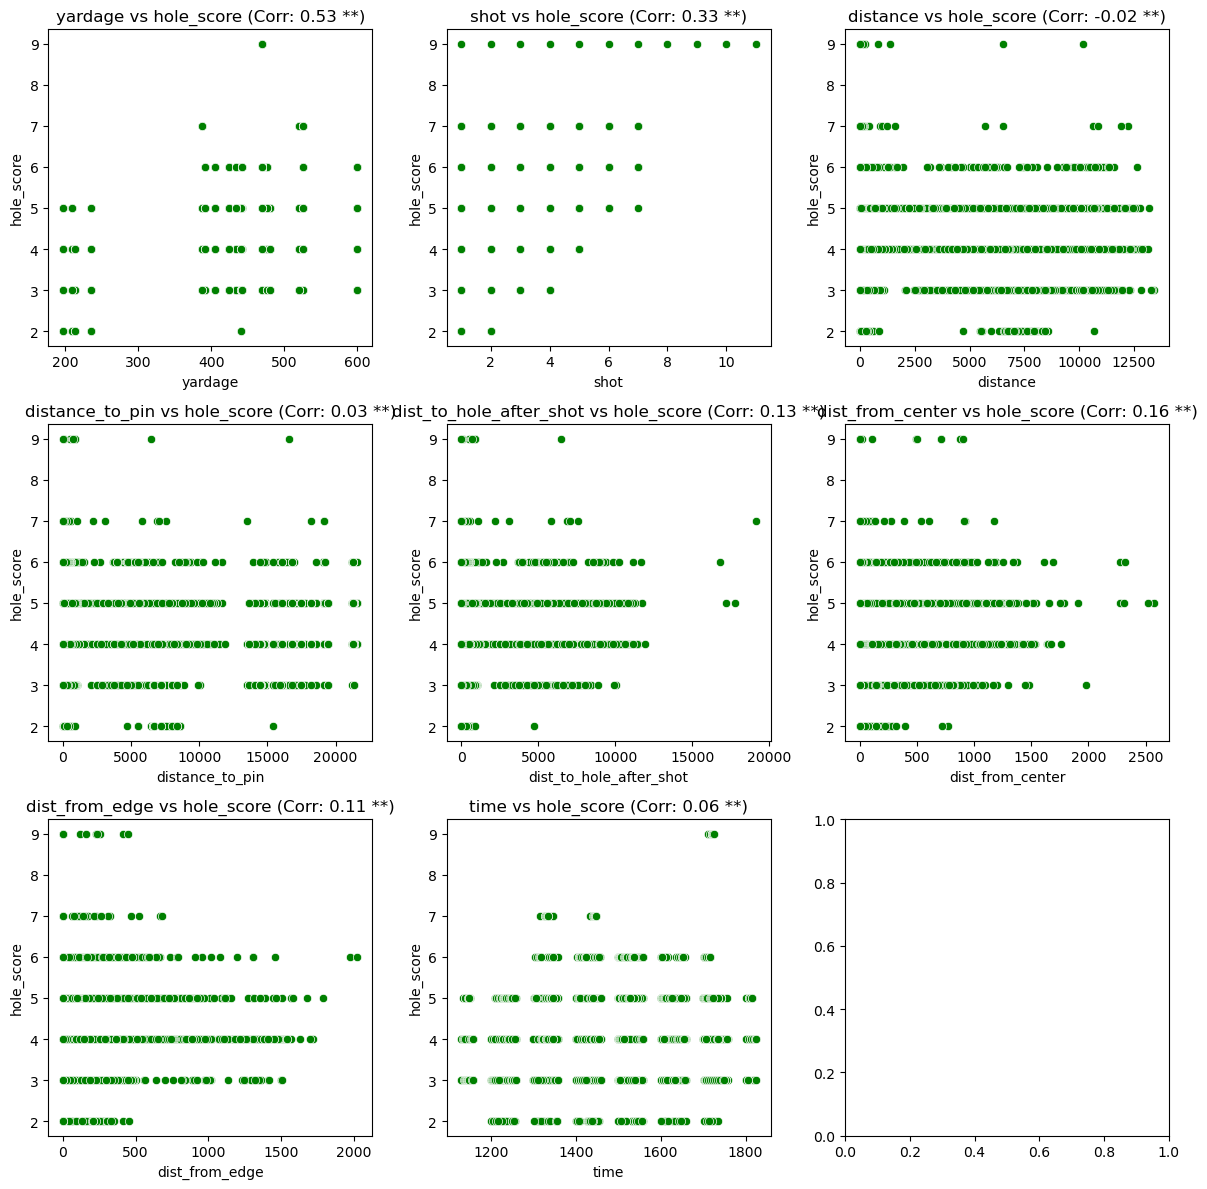

In [11]:
# Pearson correlation scatterplot
numeric_features = [
'yardage',
'shot',
'distance',
'distance_to_pin',
'dist_to_hole_after_shot',
'dist_from_center',
'dist_from_edge',
'time']

target = 'hole_score'

# Create a figure and axis
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# Loop through the numerical columns and plot each scatter plot
for i, col in enumerate(numeric_features):
    # Calculate Pearson correlation coefficient
    corr_coeff, p_val = pearsonr(df[col],df[target])

    # Scatter plot using seaborn
    sns.scatterplot(data=df, x=col, y=target, ax=axes[i//3, i%3],  color="Green")

    # Set title with Pearson correlation coefficient
    # Print ** after the correlation if the correlation coefficient is significant
    axes[i//3, i%3].set_title(f'{col} vs {target} (Corr: {corr_coeff:.2f} {"**" if p_val < 0.05 else ""})')

plt.tight_layout()
plt.show()

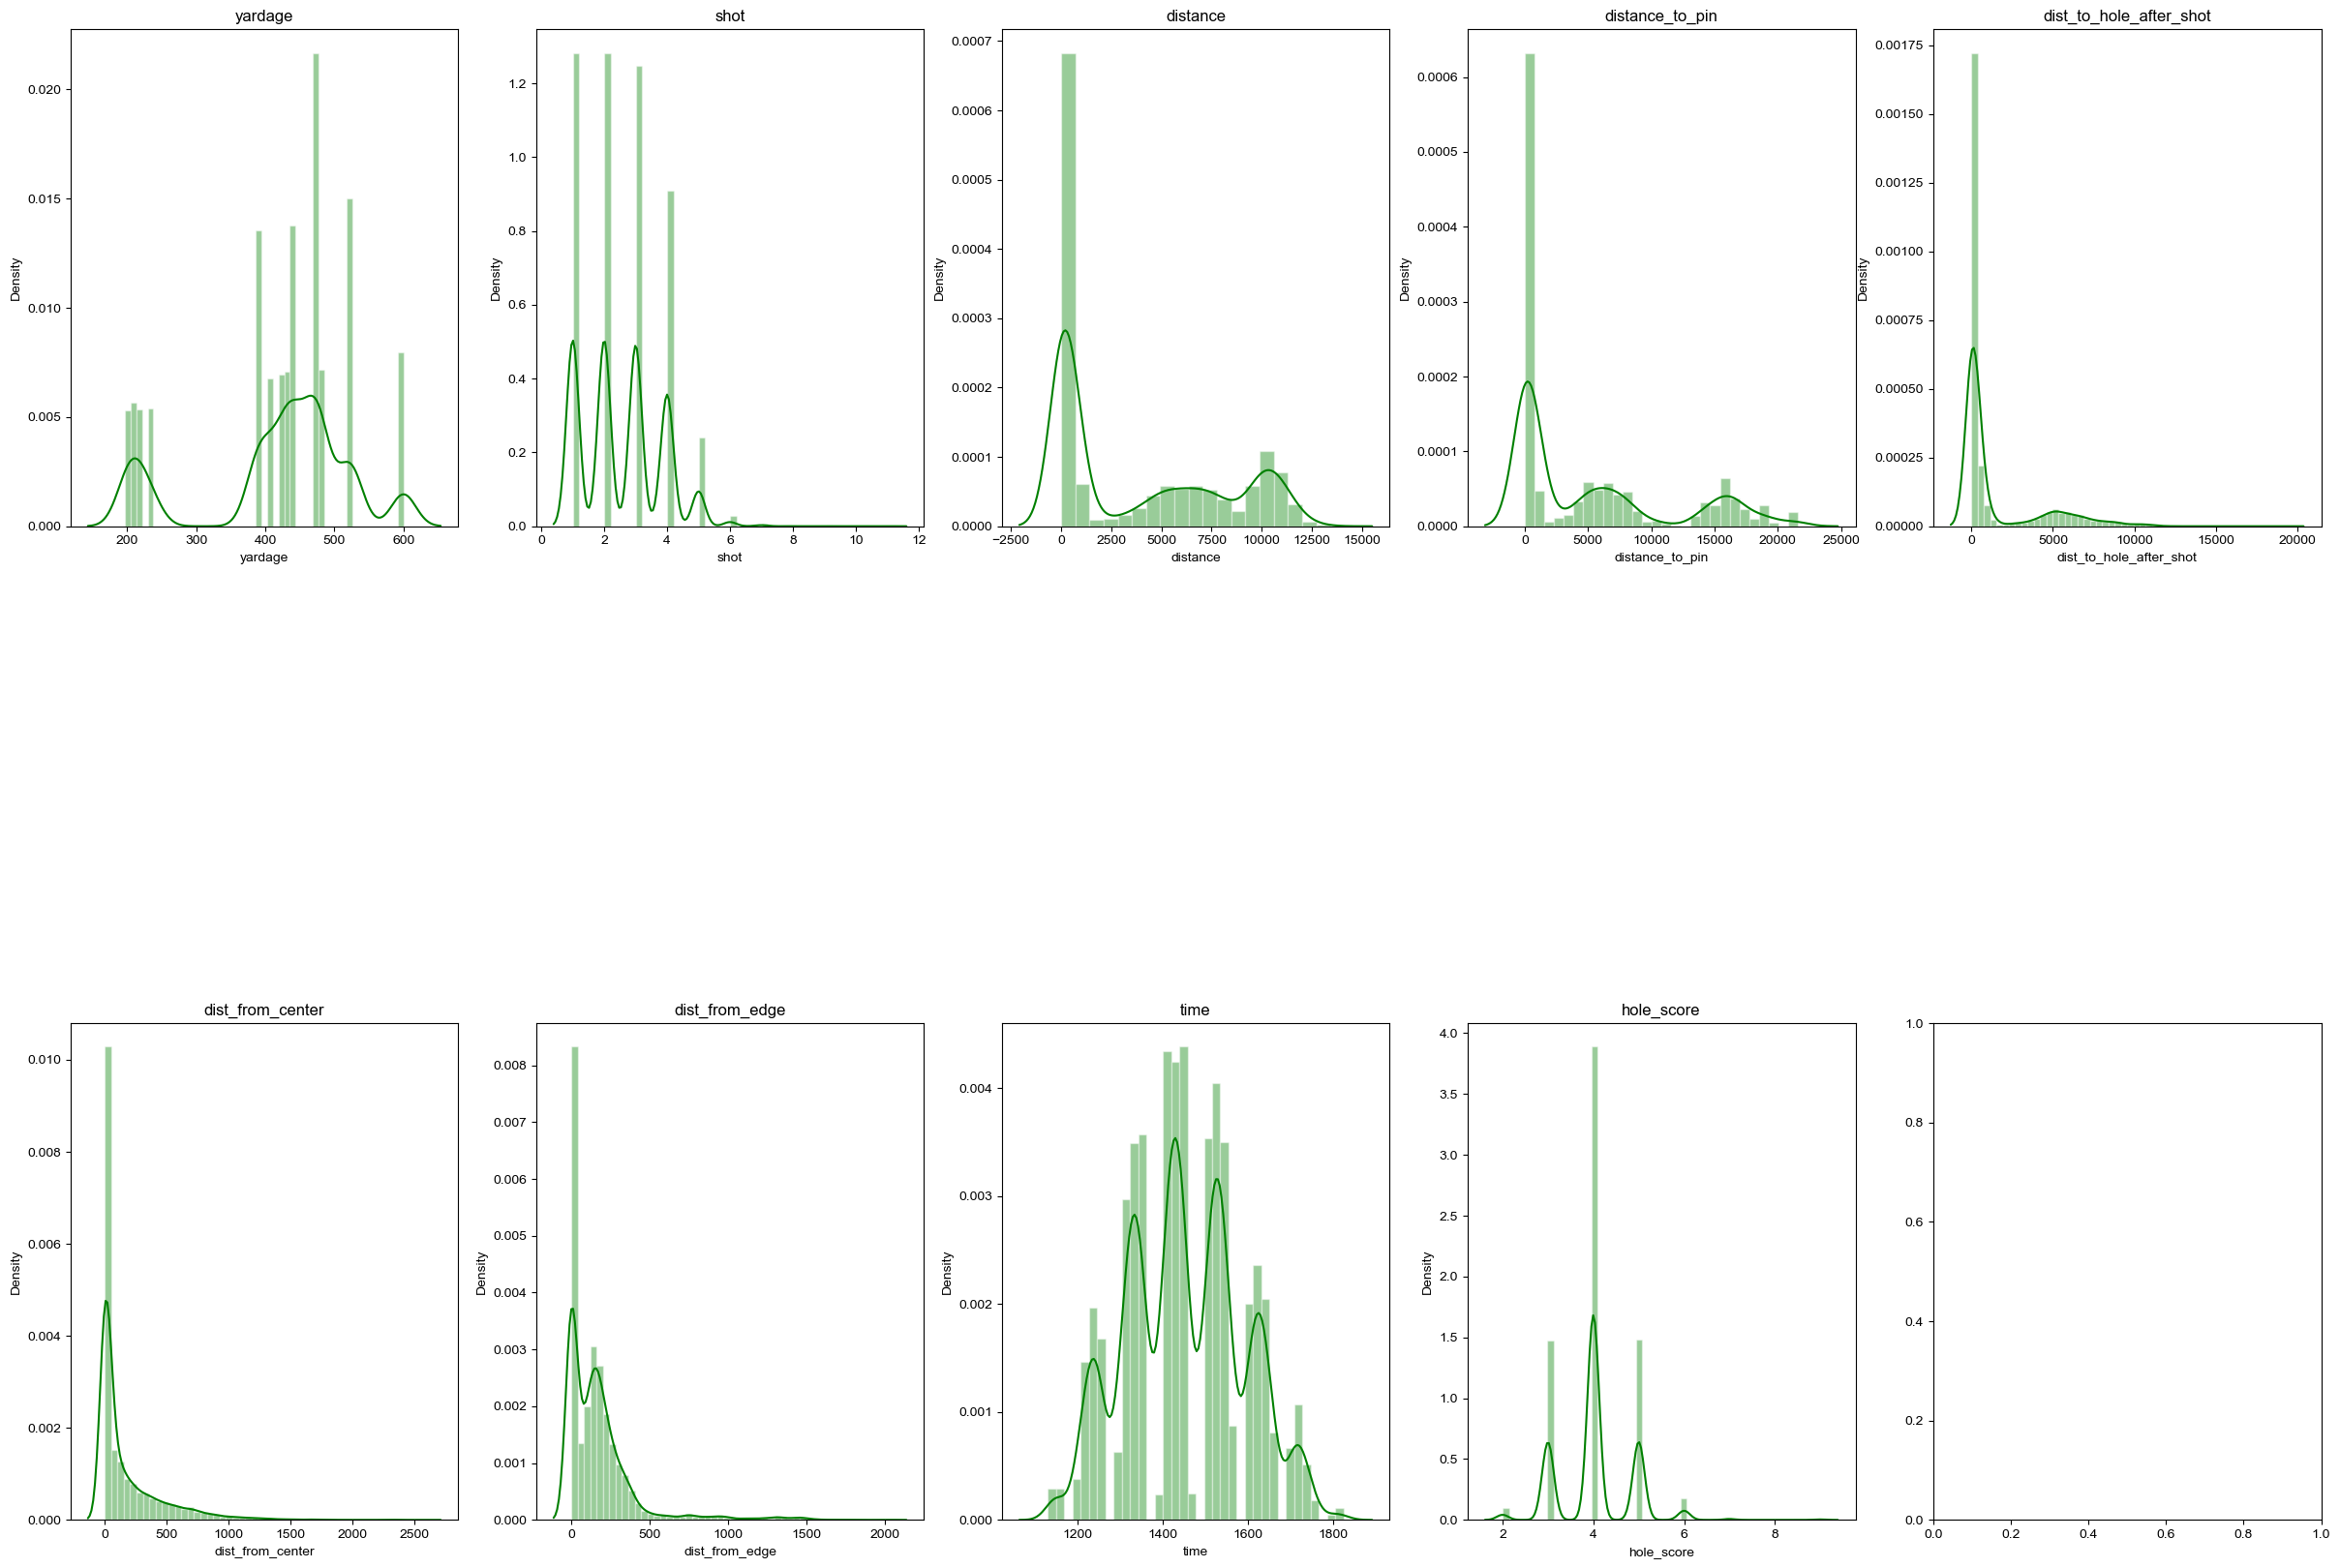

In [12]:
# Pearson correlation distplot
possible_features = df
numeric_features.append('hole_score')
possible_features = possible_features[numeric_features]
# print(possible_features.corr()["hole_score"].abs().sort_values(ascending=False))

f, ax = plt.subplots(nrows=2, ncols=5, figsize=(30, 20))
sns.set_theme(style="white")

# Selecting columns we want distributions for
hist_cols = possible_features
row = 0
col = 0

for i, column in enumerate(hist_cols):
    # Set the color to green for the histograms
    graph = sns.distplot(possible_features[column], ax=ax[row][col], color='green')
    graph.set(title=column)
    col += 1
    if col == 5:
        col = 0
        row += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
plt.show()

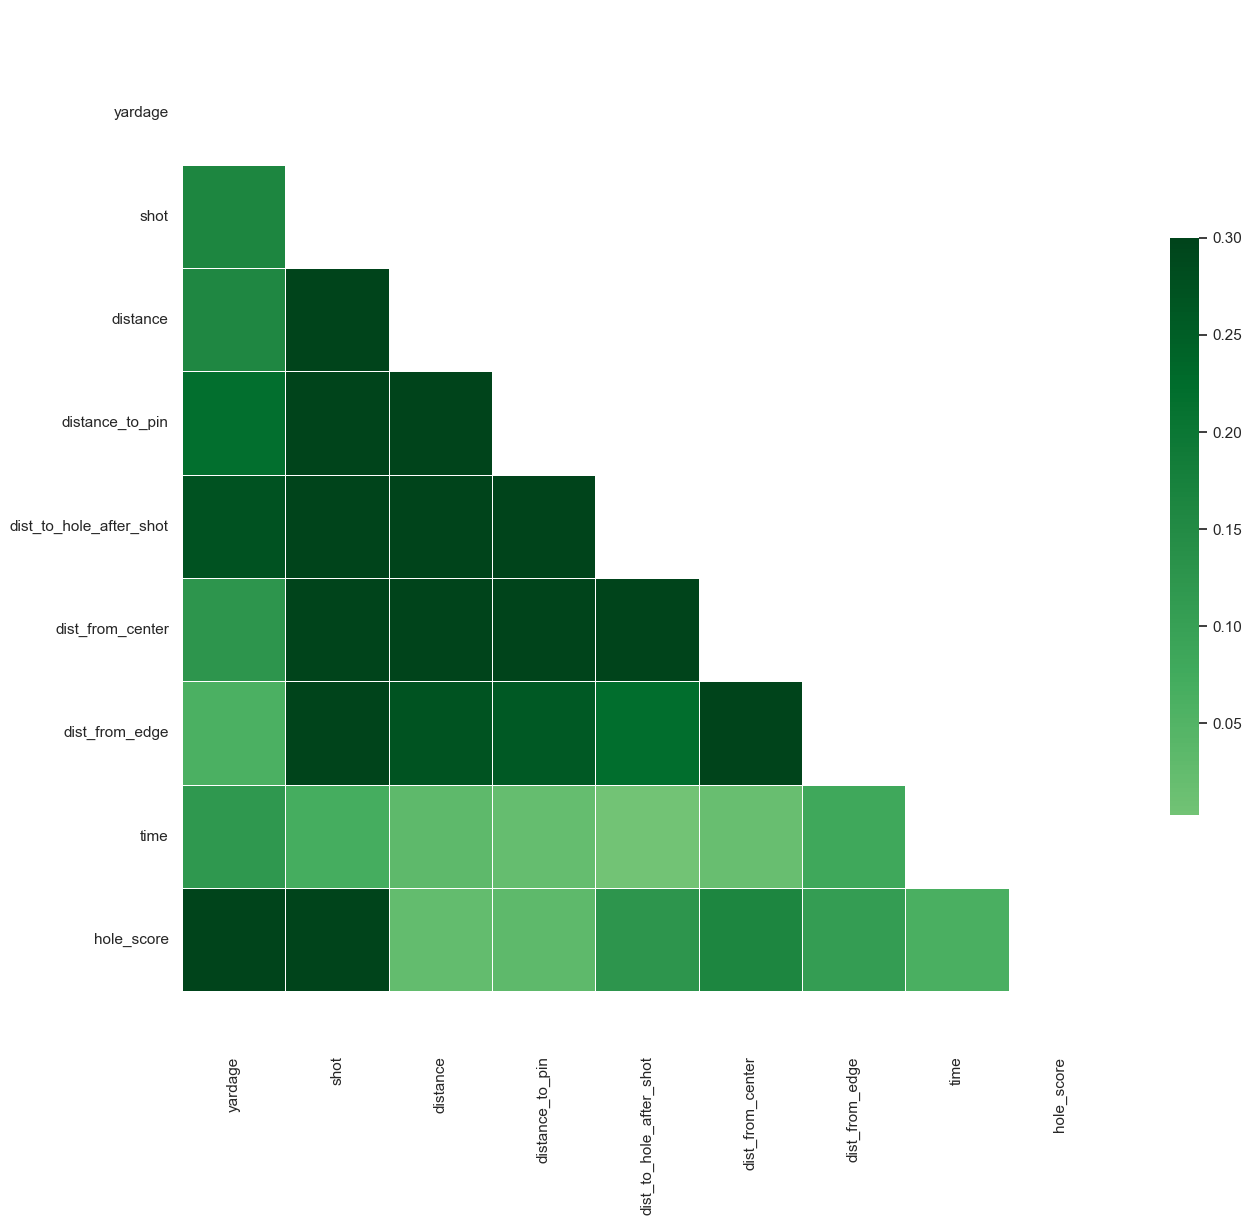

In [13]:
# # Pearson correlation heatmap
corr = possible_features.corr(method='pearson', min_periods=1)
matrix = np.triu(corr)

plt.figure(figsize=(15, 15))

sns.heatmap(possible_features.corr().abs(), 
            annot=False, cmap="Greens", 
            mask=matrix,
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

## **Numeric vs Categorical**

### **One Way ANOVA**

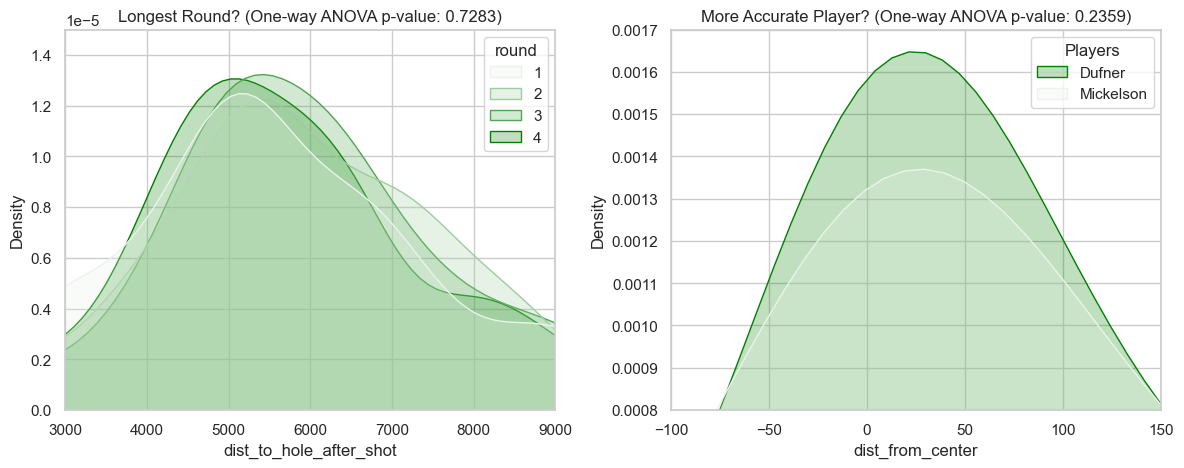

In [14]:
# Define the green palette
green_palette = sns.light_palette("green", as_cmap=True)

# Plot 1
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1
ax = sns.kdeplot(data=df, x="dist_to_hole_after_shot", hue="round", fill=True, palette=green_palette, ax=axs[0])

# Calculate one-way ANOVA p-value
p_value = f_oneway(*[df[df['round'] == cat]['dist_to_hole_after_shot'] for cat in df['round'].unique()])[1]

# Set axes limit
ax.set_xlim(3000, 9000)
ax.set_ylim(0, 0.000015)

# Set title with one-way ANOVA p-value
ax.set_title(f'Longest Round? (One-way ANOVA p-value: {p_value:.4f})')

# Plot 2
filtered_df = df[df['player_id'].isin([1810, 25686])]
ax = sns.kdeplot(data=filtered_df, x="dist_from_center", hue="player_id", fill=True, palette=green_palette, ax=axs[1])

# Calculate one-way ANOVA p-value
p_value = f_oneway(*[filtered_df[filtered_df['player_id'] == cat]['dist_from_center'] for cat in filtered_df['player_id'].unique()])[1]

plt.legend(title="Players", loc='upper right', labels=['Dufner', 'Mickelson'])

# Set axes limit
ax.set_xlim(-100, 150)
ax.set_ylim(0.0008, 0.0017)

# Set title with one-way ANOVA p-value
ax.set_title(f'More Accurate Player? (One-way ANOVA p-value: {p_value:.4f})')

plt.tight_layout()
plt.show()


## **Categorical vs Categorical**

### **Chi Square**

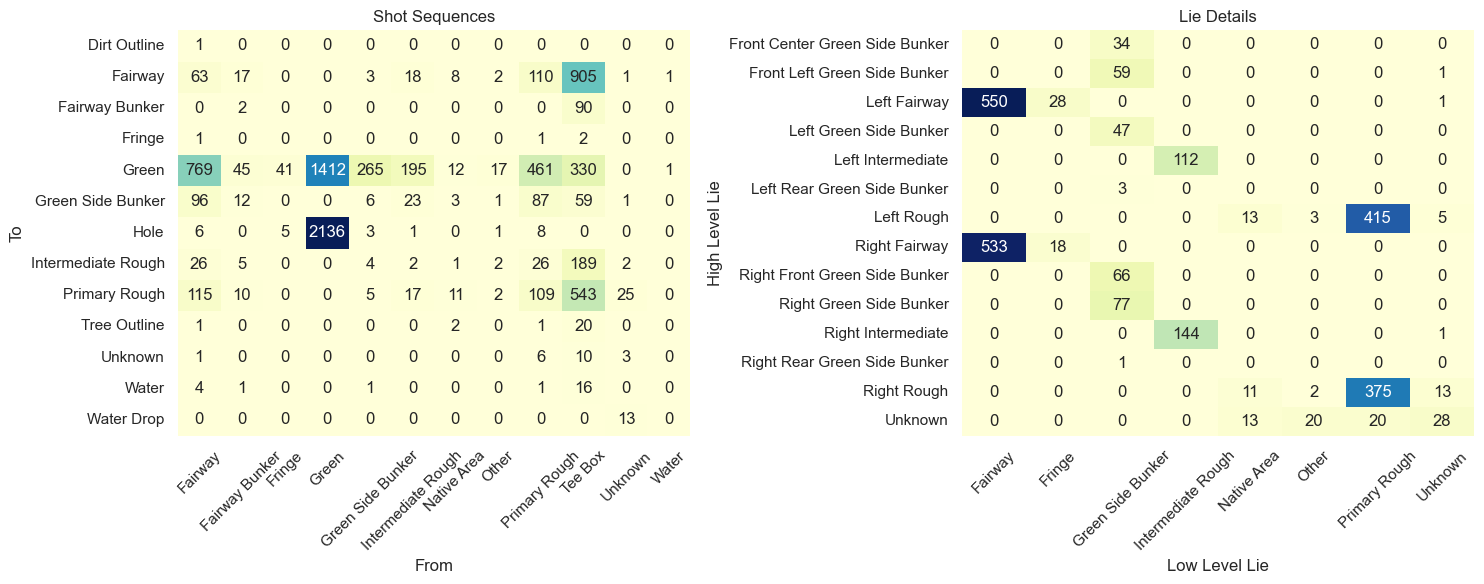

In [15]:
df['to_location_scorer'] =    np.where(df['dist_to_hole_after_shot'] == 0, 'Hole',df['to_location_scorer'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

contingency_table = pd.crosstab(df['to_location_scorer'], df['from_location_scorer'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
# print("Chi-square statistic:", chi2_stat)
# print("p-value:", p_val)
# print("Degrees of freedom:", dof)
# print("Expected frequencies table:")
# print(expected)

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0], cbar=False)
axes[0].set_title('Shot Sequences')
axes[0].set_xlabel('From')
axes[0].set_ylabel('To')
axes[0].tick_params(axis='x', rotation=45)

temp_df = df[df['from_location_scorer'] != 'Water']
temp_df = temp_df[temp_df['from_location_scorer'] != 'Green']
temp_df = temp_df[temp_df['from_location_scorer'] != 'Fairway Bunker']

contingency_table_2 = pd.crosstab(temp_df['from_location_laser'], temp_df['from_location_scorer'])

# Perform chi-square test
# chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table_2)
# Print results
# print("Chi-square statistic:", chi2_stat)
# print("p-value:", p_val)
# print("Degrees of freedom:", dof)
# print("Expected frequencies table:")
# print(expected)

sns.heatmap(contingency_table_2, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1], cbar=False)
axes[1].set_title('Lie Details')
axes[1].set_xlabel('Low Level Lie')
axes[1].set_ylabel('High Level Lie')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Missing Data**

In [16]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
first_putt,6285,0.746260
from_location_laser,2189,0.259915
to_location_laser,2175,0.258252
lie,1121,0.133104
to_location_scorer,27,0.003206
dist_to_hole_after_shot,0,0.000000
distance,0,0.000000
distance_to_pin,0,0.000000
in_the_hole,0,0.000000
around_the_green,0,0.000000


<Axes: >

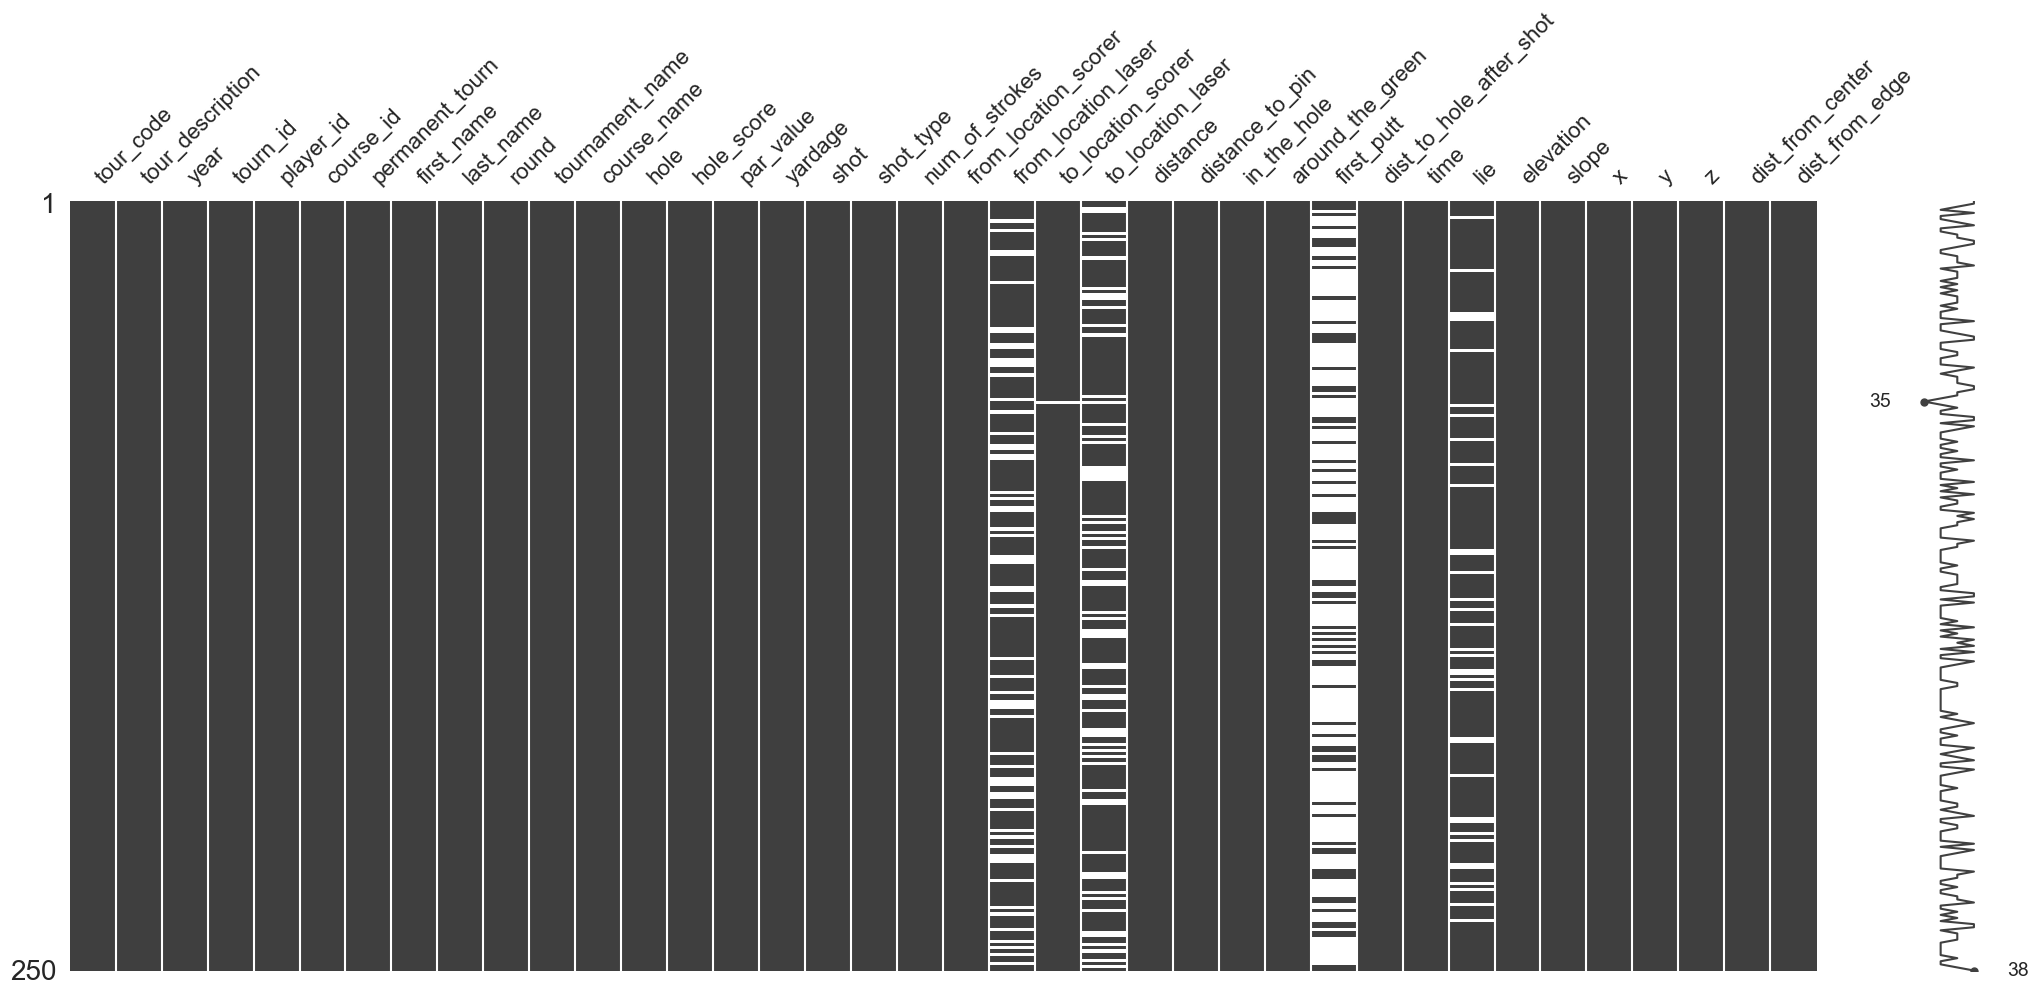

In [17]:
msno.matrix(df.sample(250))

<Axes: >

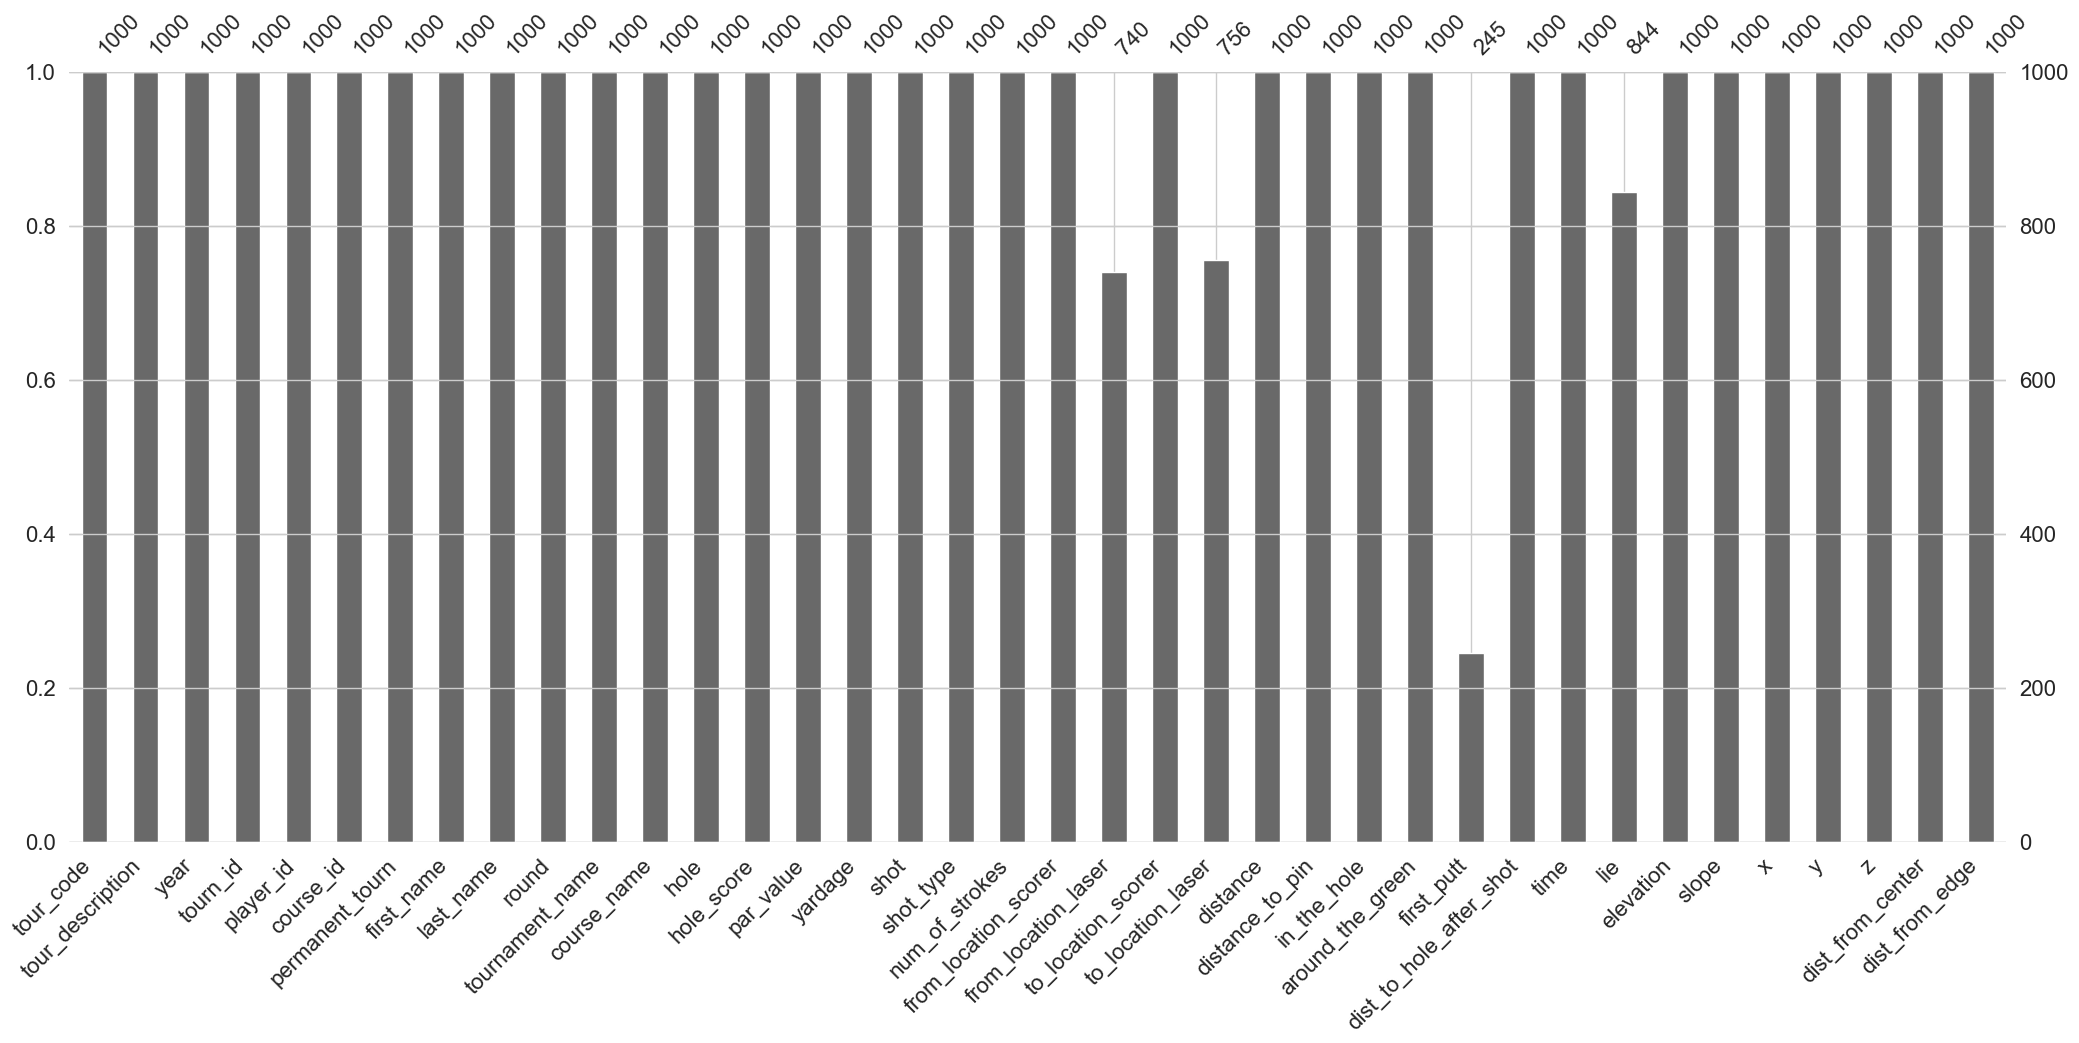

In [18]:
msno.bar(df.sample(1000))

<Axes: >

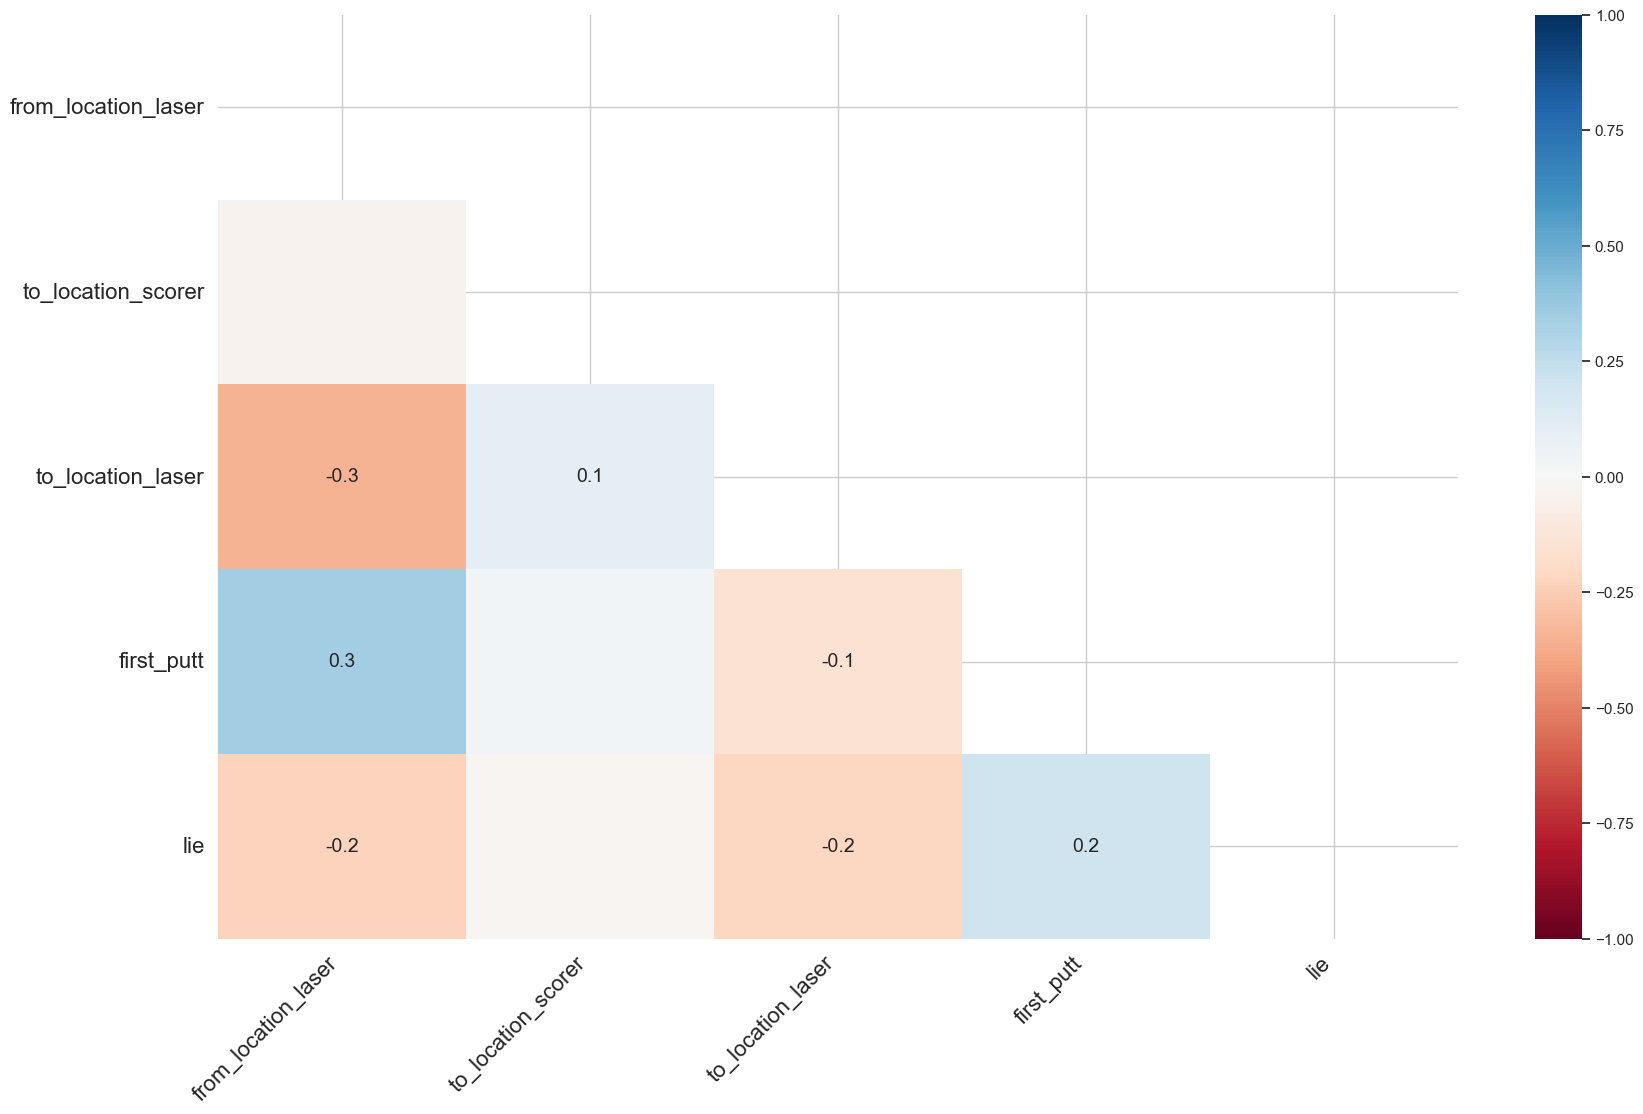

In [19]:
msno.heatmap(df)